# <center> <div style="width: 370px;"> ![Dijkstra](pictures/Dijkstra.jpg)

# <center> Dijkstra

|Restrictions||SSSP Algorithm||
|-----|----|-----|------|
Graph|Weights|Name|Running Time (O(·))|
|  General| Unweighted  |  BFS | $$ |V|+|E| $$   |     |V| + |E|       |
| DAG |Any| DAG Relaxation       |              $$ |V|+|E| $$              |     |V| + |E|       |
|            General| Any              |     Bellman-Ford         |   $$ |V| \dot |E| $$              |         |V| · |E|     |   General
|    General|              Non-negative                  |       Dijkstra           |              $$ |V| \log |V| + |E|       $$        |                     |


## Dijkstra’s Algorithm

Dijkstra's algorithm is one of the most widely used algorithms for finding the shortest paths in weighted graphs. It outperforms Bellman-Ford in terms of asymptotic speed but comes with the limitation that it can only be applied to graphs where all edge weights are non-negative. Fortunately, such graphs are common in various real-world applications.

The concept behind Dijkstra's algorithm is relatively intuitive. Think of a weighted graph as a network of pipes, each with a non-negative length (weight). Imagine turning on a water faucet at a source vertex 's.' If we assume that water flows through each pipe at the same rate, it will naturally reach each intersection vertex in the order of their shortest distance from the source.

Dijkstra's algorithm discretizes this continuous process by repeatedly relaxing edges starting from a vertex whose minimum weight path estimate is the smallest among all vertices whose outgoing edges have not yet been relaxed. To efficiently find this smallest minimum weight path estimate, Dijkstra's algorithm often employs a minimum priority queue data structure.

Below is a Python implementation of Dijkstra's algorithm using priority queue operations:

```python
1 def dijkstra(Adj, w, s):
2     d = [float('inf') for _ in Adj] # shortest path estimates d(s, v)
3     parent = [None for _ in Adj]    # initialize parent pointers
4     d[s], parent[s] = 0, s          # initialize source
5     Q = PriorityQueue()             # initialize an empty priority queue
6     V = len(Adj)                    # number of vertices
7     for v in range(V):              # loop through vertices
8         Q.insert(v, d[v])           # insert vertex-estimate pair
9     for _ in range(V):              # main loop
10        u = Q.extract_min()         # extract vertex with min estimate
11        for v in Adj[u]:            # loop through outgoing edges
12            try_to_relax(Adj, w, d, parent, u, v)
13            Q.decrease_key(v, d[v]) # update the key of the vertex
14    return d, parent
```

This algorithm follows a similar structure to the general relaxation framework. Lines 2-4 initialize the shortest path weight estimates and parent pointers. Lines 5-7 create a priority queue with all vertices from the graph. Lines 8-12 make up the main loop, where each iteration removes a vertex from the queue, ensuring that the queue will be empty at the loop's end. The vertex 'u' processed in each iteration is the one with the smallest shortest path weight estimate among the vertices still in the queue. Lines 10-11 perform the edge relaxation, and line 12 updates the key of the vertex if it's still in the queue.

Now, let's address the question of why Dijkstra's algorithm is suitable for graphs with non-negative edge weights. The key observation is that the shortest path weight estimate of vertex 'u' equals its actual shortest path weight 'd(s, u) = δ(s, u)' when 'u' is removed from the priority queue. By the upper-bound property, 'd(s, u) = δ(s, u)' will continue to hold until the algorithm's termination. A formal proof of correctness can be found in the lecture notes, but for now, we'll focus on analyzing the algorithm's running time when implemented using different types of priority queues.

Exercise: To further understand Dijkstra's algorithm, consider constructing a weighted graph with non-negative edge weights and applying Dijkstra's algorithm to find the shortest paths. Specifically, list the key-value pairs stored in the priority queue after each iteration of the main loop and highlight the edges corresponding to the constructed parent pointers.

### Algorithm

- Set $d(s, v) = ∞$ for all $v ∈ V$ , then set $d(s, s) = 0$
- Build changeable priority queue `Q` with an item $(v, d(s, v))$ for each vertex $v ∈ V$
- While `Q` not empty, delete an item $(u, d(s, u))$ from `Q` that has minimum $d(s, u)$
     - For vertex `v` in outgoing adjacencies $Adj^+(u)$:
         - If $d(s, v) > d(s, u) + w(u, v)$:
             - Relax edge $(u, v), \ i.e., \ set d(s, v) = d(s, u) + w(u, v)$
             - Decrease the key of `v` in `Q` to new estimate $d(s, v)$

**Run Dijkstra on example**

# <center> <div style="width: 370px;"> 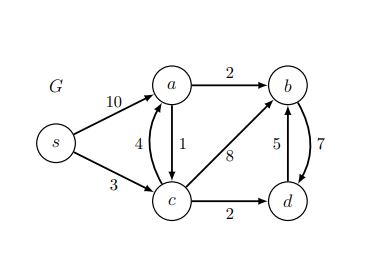




|$v$ from $Q$|s|a|b|c|d|
|-|-|-|-|-|-|
|<center>s|0|∞|∞|∞|
|<center>c||10|∞|3|∞|
|<center>d||7|11||5|
|<center>a||7|10|||
|<center>b|||9|||
|<center>δ(s, v)|0|7|9|3|5|

### Running Time

- • Count operations on changeable priority queue `Q`, assuming it contains `n` items: 

|Operation| Time|ccurrences in Dijkstra|
|-|-|-|
|Q.build(X) ($n = |X|$)|$B_n$|$$1$$|
|Q.delete_min()|$M_n$| $$|V|$$|
|Q.decrease_key(id, k)|$D_n$|$$|E|$$|

- Total running time is $O(B_{|V |} + |V | · M_{|V |} + |E| · D_{|V |})$

### Priority Queues

Priority Queues

An essential component of Dijkstra's algorithm is the use of a priority queue. The priority queue interface employed here slightly differs from our earlier presentations of priority queues in this term. In this context, a priority queue maintains a set of key-value pairs, where each vertex 'v' is a value, and 'd(s, v)' represents its associated key. Beyond its initial empty state, the priority queue supports three fundamental operations:

1. `insert(val, key)` adds a key-value pair to the queue.
2. `extract_min()` removes and returns a value from the queue with the minimum key.
3. `decrease_key(val, new key)` reduces the key of a specified value stored in the queue to the provided new key.

The efficiency of Dijkstra's algorithm hinges on the performance of these operations. Specifically, if 'Ti', 'Te', and 'Td' represent the respective running times for inserting a key-value pair, extracting a value with the minimum key, and decreasing the key of a value, then the running time of Dijkstra is given by:

```
TDijkstra = O(|V| · Ti + |V| · Te + |E| · Td).
```

There are various ways to implement a priority queue, each achieving different running times for these operations. Perhaps the simplest implementation is to maintain all the vertices and their current shortest path estimates in a dictionary. A hash table of size 'O(|V|)' can provide expected constant-time 'O(1)' insertion and decrease-key operations. However, finding and extracting the vertex with the minimum key still takes linear time 'O(|V|)'. If the vertices are indexed into the vertex set with a linear range, an alternative is to use a direct access array, leading to worst-case 'O(1)' time for insertion and decrease-key, while still requiring 'O(|V|)' to find and extract the vertex with the minimum key. In both cases, the running time for Dijkstra simplifies to:

```
TDict = O(|V|^2 + |E|).
```

This is a favorable result! For dense graphs where 'E' approaches 'Ω(|V|^2)', this implementation is linear in the size of the input graph.

Below is a Python implementation of Dijkstra's algorithm using a direct access array to implement the priority queue:

```python
class PriorityQueue: # Hash Table Implementation
    def __init__(self): # stores keys with unique labels
        self.A = {}

    def insert(self, label, key): # insert labeled key
        self.A[label] = key

    def extract_min(self): # return a label with the minimum key
        min_label = None
        for label in self.A:
            if (min_label is None) or (self.A[label] < self.A[min_label].key):
                min_label = label
        del self.A[min_label]
        return min_label

    def decrease_key(self, label, key): # decrease key of a given label
        if (label in self.A) and (key < self.A[label]):
            self.A[label] = key
```

For sparse graphs where 'E' is 'O(|V|)', more advanced priority queue implementations can offer improved performance. We have seen that a binary min-heap can implement insertion and extraction of the minimum element in 'O(log n)' time. However, decreasing the key of a value stored in a priority queue typically requires finding the value in the heap, which naively could take linear time. This challenge can be addressed by having each vertex maintain a pointer to its stored location within the heap, or by having the heap maintain a mapping from values (vertices) to their locations within the heap (as you were asked to do in Problem Set 5). Either solution can support finding a given value in the heap in constant time. After decreasing the value's key, one can restore the min-heap property in logarithmic time by re-heapifying the tree. Since a binary heap can support each of the three operations in 'O(log |V|)' time, the running time of Dijkstra becomes:

```
THeap = O((|V| + |E|) * log |V|).
```

For sparse graphs, this is 'O(|V| * log |V|)! For graphs that fall between sparse and dense, a more sophisticated priority queue implementation using a data structure called a Fibonacci Heap can achieve amortized 'O(1)' time for insertion and decrease-key operations, along with 'O(log n)' time for minimum extraction. Therefore, using a Fibonacci Heap to implement the Dijkstra priority queue results in the following worst-case running time:

```
TFibHeap = O(|V| * log |V| + |E|).
```

While we won't delve extensively into Fibonacci Heaps in this course, they are theoretically valuable for accelerating Dijkstra's algorithm on graphs with a number of edges asymptotically between linear and quadratic concerning the number of graph vertices. You can refer to the Fibonacci Heap running time bound when discussing the running time of Dijkstra for theoretical questions.